In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('MaunaLoaDailyTemps.csv')
df

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


In [8]:
# Answer to Q1 : 331
data.loc[(data['AvgTemp'] > 50)]

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
24,1/25/2014,41.0,62.0,52.0,659,1811
107,4/18/2014,43.0,60.0,52.0,602,1841
108,4/19/2014,43.0,60.0,52.0,602,1841
114,4/25/2014,43.0,59.0,51.0,558,1843
115,4/26/2014,45.0,62.0,54.0,557,1844
...,...,...,...,...,...,...
1732,9/29/2018,43.0,61.0,52.0,613,1812
1733,9/30/2018,43.0,62.0,53.0,613,1811
1734,10/1/2018,40.0,63.0,52.0,613,1811
1737,10/4/2018,43.0,58.0,51.0,614,1808


In [10]:
# Answer to Q2 : 2015
data.loc[data['MaxTemp'].idxmax()]

DATE       6/18/2015
MinTemp         45.0
MaxTemp         67.0
AvgTemp         56.0
Sunrise          544
Sunset          1903
Name: 533, dtype: object

In [16]:
data.isnull().sum()

DATE       0
MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [18]:
# Answer to Q3 : Fill NA with Mean
data['MinTemp'].fillna(data['MinTemp'].mean(), inplace = True)
data['MaxTemp'].fillna(data['MinTemp'].mean(), inplace = True)
data['AvgTemp'].fillna(data['MinTemp'].mean(), inplace = True)

In [19]:
data.isnull().sum()

DATE       0
MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [34]:
# Answer to Q6, Q7 : Stationary , p < 0.05 data is stationary
# 'Sunrise' timeseries data is stationary, based on fuller statistical test
from statsmodels.tsa.stattools import adfuller
adf_results = {}

for col in data.loc[:, data.columns != 'DATE'].columns.values: 
    adf_results[col] = adfuller(data[col])
    print('adf, p-value of %s %f %f '% (col,adf_results[col][0],adf_results[col][1]))

adf, p-value of MinTemp -4.396859 0.000301 
adf, p-value of MaxTemp -7.456142 0.000000 
adf, p-value of AvgTemp -6.618515 0.000000 
adf, p-value of Sunrise -3.207463 0.019557 
adf, p-value of Sunset -2.211108 0.202239 


In [45]:
# Answer to Q5 : SARIMAX(2, 0, 5) | ARIMA(2,0,5)(0,0,0)[0]
# Determine the best p,q,d param values
from pmdarima import auto_arima
arima = auto_arima(data['Sunrise'], trace=True)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10525.935, Time=1.70 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18718.599, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=16391.734, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28580.923, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=10545.429, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=10526.150, Time=1.43 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=10517.107, Time=1.81 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=10525.381, Time=1.90 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=10497.243, Time=2.22 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=10507.171, Time=2.09 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=10450.895, Time=2.73 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=10452.561, Time=1.91 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=10449.414, Time=2.88 sec
 ARIMA(4,0,3)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(2, 0, 5)   Log Likelihood               -5204.744
Date:                Tue, 05 Jul 2022   AIC                          10427.487
Time:                        18:42:49   BIC                          10477.071
Sample:                             0   HQIC                         10445.778
                               - 1825                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7244      0.764      0.948      0.343      -0.773       2.222
ar.L1          1.9412      0.078     24.738      0.000       1.787       2.095
ar.L2         -0.9424      0.077    -12.195      0.000      -1.094      -0.791
ma.L1         -0.9373      0.115     -8.124      0.000      -1.163      -0.711
ma.L2         -0.0020      0.162     -0.013      0.990      -0.320       0.316
ma.L3          0.0217      0.174      0.125      0.901      -0.320       0.364
ma.L4         -0.2852      0.112     -2.551      0.011      -0.504      -0.066
ma.L5          0.2824      0.023     12.168      0.000       0.237       0.328
sigma2        18.1171      0.217     83.587      0.000      17.692      18.542
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):            464102.39
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        81.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
# Answer to Q9 : Coeff of AR : 0.99
from statsmodels.tsa.arima_model import ARIMA
train = data['Sunrise'].iloc[:300]
test = data['Sunrise'].iloc[301:]
model = ARIMA(train, order=(2, 0, 5))
model = model.fit()
model.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessi

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Sunrise   No. Observations:                  300
Model:                     ARMA(2, 5)   Log Likelihood                -882.038
Method:                       css-mle   S.D. of innovations              4.519
Date:                Tue, 05 Jul 2022   AIC                           1782.077
Time:                        18:43:36   BIC                           1815.411
Sample:                             0   HQIC                          1795.417
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           598.1427      5.629    106.255      0.000     587.109     609.176
ar.L1.Sunrise     1.9964      0.003    673.558      0.000       1.991       2.002
ar.L2.Sunrise    -0.9968      0.003   -333.391      0.000      -1.003      -0.991
ma.L1.Sunrise    -1.0254      0.058    -17.815      0.000      -1.138      -0.913
ma.L2.Sunrise     0.0043      0.079      0.054      0.957      -0.151       0.160
ma.L3.Sunrise     0.0150      0.079      0.190      0.850      -0.140       0.170
ma.L4.Sunrise    -0.2801      0.079     -3.559      0.000      -0.434      -0.126
ma.L5.Sunrise     0.2863      0.057      5.027      0.000       0.175       0.398
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0014           -0.0210j            1.0016           -0.0033
AR.2            1.0014           +0.0210j            1.0016            0.0033
MA.1           -1.3709           -0.0000j            1.3709           -0.5000
MA.2            0.0064           -1.3808j            1.3808           -0.2493
MA.3            0.0064           +1.3808j            1.3808            0.2493
MA.4            1.0000           -0.0000j            1.0000           -0.0000
MA.5            1.3366           -0.0000j            1.3366           -0.0000
-----------------------------------------------------------------------------
"""

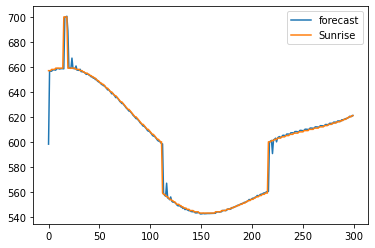

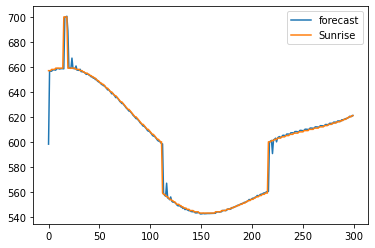

In [49]:
model.plot_predict(dynamic=False)

In [50]:
predict = model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)

In [51]:
import matplotlib.pyplot as plt

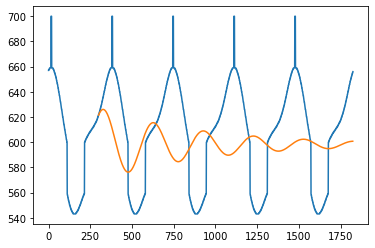

In [52]:
plt.plot(data['Sunrise'])
plt.plot(predict)
plt.show()

<AxesSubplot:>

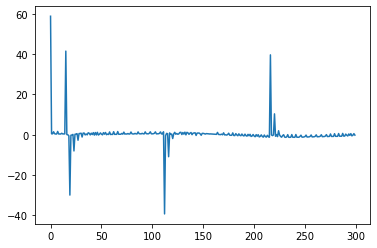

In [55]:
# Error, residual plot
model.resid.plot()

In [56]:
# Answer to Q 8 : 2.6%
model.resid.mean()

0.2657805421089192

In [ ]:
# Answer to Q10 : Stationary refers to time series data that mean and variance do not vary across time
# Answer to Q11 :  
# Answer to Q12 : Autocorrelation and multiple-box plot
# Answer to Q13 : True
# Answer to Q14 : 
# Answer to Q15 : All of above